In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, DotProduct

[ 0.97873798  2.2408932 ]
[False False  True  True  True False False False  True  True  True  True
  True  True False False False  True False False False  True False  True
 False  True False  True False False False False  True  True  True False
  True  True False  True  True  True False  True  True  True False False
 False False  True  True  True False False False  True  True  True False
  True False False  True False  True  True  True  True  True  True False
 False  True False  True False False  True False  True False  True False
 False False  True  True False  True False False  True  True  True  True
 False  True False False False False  True False  True False  True False
  True  True False  True  True False False False  True  True  True False
 False False False False False  True  True False False  True False False
  True False  True  True False False  True  True  True  True False  True
 False False  True  True False  True  True False  True False  True  True
 False  True False False 

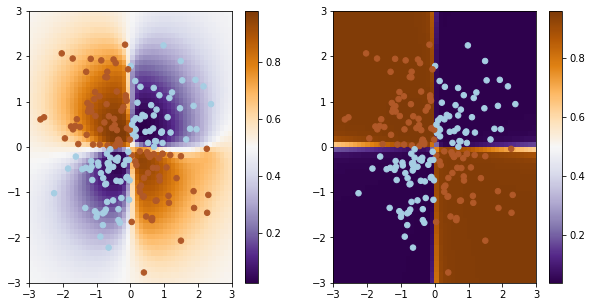

In [19]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 50),np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)
X = rng.randn(200, 2)
Y = np.logical_xor(X[:,0] > 0, X[:,1] > 0)

plt.figure(figsize=(10,5))
kernels = [1.0 * RBF(length_scale=1.0), 1.0*DotProduct(sigma_0=1.0)**2]
for i, kernel in enumerate(kernels):
    clf = GaussianProcessClassifier(kernel=kernel, warm_start=True).fit(X,Y)
    Z = clf.predict_proba(np.vstack((xx.ravel(),yy.ravel())).T)[:,1]
    Z = Z.reshape(xx.shape)
    
    plt.subplot(1,2,i+1)
    image = plt.imshow(Z, interpolation="nearest",extent=(xx.min(),xx.max(),yy.min(),yy.max()),\
                      aspect="auto",origin="lower",cmap=plt.cm.PuOr_r)
    contour = plt.contour(xx,yy,Z,levels=[0],linewidths=2, linetypes="--")
    plt.scatter(X[:,0],X[:,1],s=30,c=Y, cmap=plt.cm.Paired)
    plt.colorbar(image)